Données de Sampson

Les données de Sampson peuvent être représentées sous forme de matrice d'adjacence où chaque cellule (i, j) indique la force de la relation entre les novices i et j. Voici un exemple simplifié des données de Sampson sous forme de matrice d'adjacence.

In [1]:
import numpy as np

# Exemple simplifié de la matrice d'adjacence des données de Sampson
sampson_data = np.array([
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
])


Clustering des Nœuds

Nous utiliserons un algorithme de clustering hiérarchique pour regrouper les novices en blocs.

In [2]:
from sklearn.cluster import AgglomerativeClustering

# Appliquer un clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = clustering.fit_predict(sampson_data)

# Affichage des clusters
print(f"Clusters des novices : {clusters}")


Clusters des novices : [0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Construction de la Matrice de Bloc

Nous allons maintenant construire la matrice de bloc en regroupant les nœuds selon leurs clusters et en calculant les relations moyennes entre les blocs.

In [3]:
def create_blockmodel(adj_matrix, clusters):
    n_blocks = len(set(clusters))
    blockmodel = np.zeros((n_blocks, n_blocks))

    for i in range(n_blocks):
        for j in range(n_blocks):
            block_i = np.where(clusters == i)[0]
            block_j = np.where(clusters == j)[0]
            sub_matrix = adj_matrix[np.ix_(block_i, block_j)]
            blockmodel[i, j] = np.mean(sub_matrix)

    return blockmodel

blockmodel = create_blockmodel(sampson_data, clusters)
print("Matrice de bloc :")
print(blockmodel)


Matrice de bloc :
[[0.48979592 0.02380952 0.        ]
 [0.02380952 0.5        0.1       ]
 [0.         0.1        0.56      ]]


Visualisation de la Matrice de Bloc

Enfin, nous allons visualiser la matrice de bloc pour interpréter les relations entre les blocs.

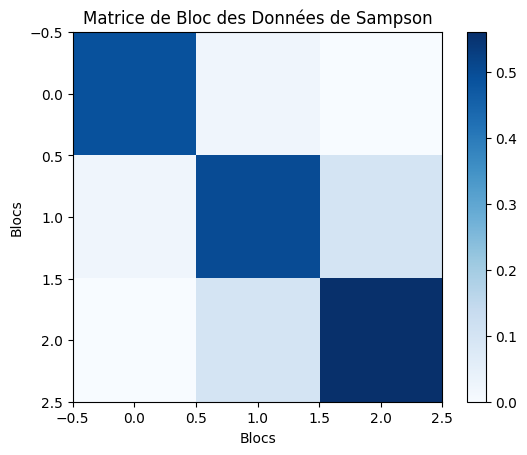

In [4]:
import matplotlib.pyplot as plt

plt.imshow(blockmodel, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Matrice de Bloc des Données de Sampson")
plt.xlabel("Blocs")
plt.ylabel("Blocs")
plt.show()
